## Using Random forest Classifier on a heart disease detection dataset

Dataset retreived from: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

import pandas as pd

#### Data description
    age: age in years
    sex: sex (1 = male; 0 = female)
    cp: chest pain type
    -- Value 0: typical angina
    -- Value 1: atypical angina
    -- Value 2: non-anginal pain
    -- Value 3: asymptomatic
    trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    chol: serum cholestoral in mg/dl
    fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    thalach: maximum heart rate achieved
    exang: exercise induced angina (1 = yes; 0 = no)
    oldpeak = ST depression induced by exercise relative to rest
    slope: the slope of the peak exercise ST segment
    -- Value 0: upsloping
    -- Value 1: flat
    -- Value 2: downsloping
    ca: number of major vessels (0-3) colored by flourosopy
    thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
    and the label
    condition: 0 = no disease, 1 = disease


In [35]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [36]:
data.shape

(297, 14)

In [37]:
## remove duplicate rows
data = data.drop_duplicates()
data.shape

(297, 14)

In [38]:
## check for null values
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

No null values found

### Test-train split

#### Testing different models

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

##### Random forest classifier

In [69]:
X = data.drop(['condition'], axis=1)
y = data['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.8444444444444444

The accuracy is moderately okay and doesn't seem overfit for the dataset.

##### Logistic Regression

In [71]:
model2 = LogisticRegression(max_iter=5000)
model2.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [72]:
y_pred = model2.predict(X_test)

accuracy_score(y_test, y_pred)

0.7777777777777778

### Complete model evaluation

              precision    recall  f1-score   support

           0       0.80      0.77      0.79        48
           1       0.75      0.79      0.77        42

    accuracy                           0.78        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.78      0.78      0.78        90



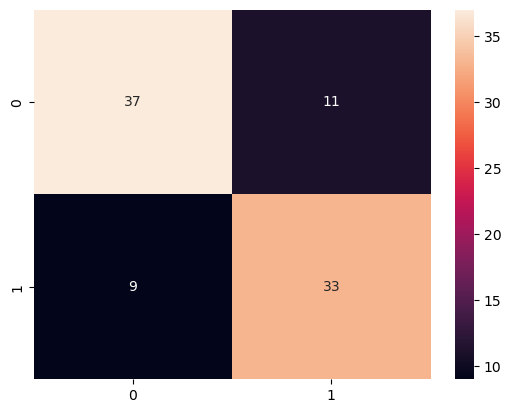

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_pred))

In [75]:
pickle.dump(model, open('model.pkl', 'wb'))